<a href="https://colab.research.google.com/github/AromaDsouza/BigMart_Sales_Prediction/blob/main/BigMart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



###Importing the necessary libraries




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

###Loading the data

In [ ]:
train_data = pd.read_csv('https://raw.githubusercontent.com/AromaDsouza/BigMart_Sales_Prediction/main/Bigmart_Train.csv')
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/AromaDsouza/BigMart_Sales_Prediction/main/Bigmart_Test.csv')
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [ ]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


###Statistical Analysis

In [ ]:
train_data.shape

(8523, 12)

In [ ]:
test_data.shape


(5681, 11)

In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
train_data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
test_data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
train_data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test_data.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#Basic EDA

Calculated bin widths:
Item_Weight: 0.841985959228946
Item_Visibility: 0.00661838928486656
Item_MRP: 8.989934845026276
Item_Outlet_Sales: 221.96955255095966


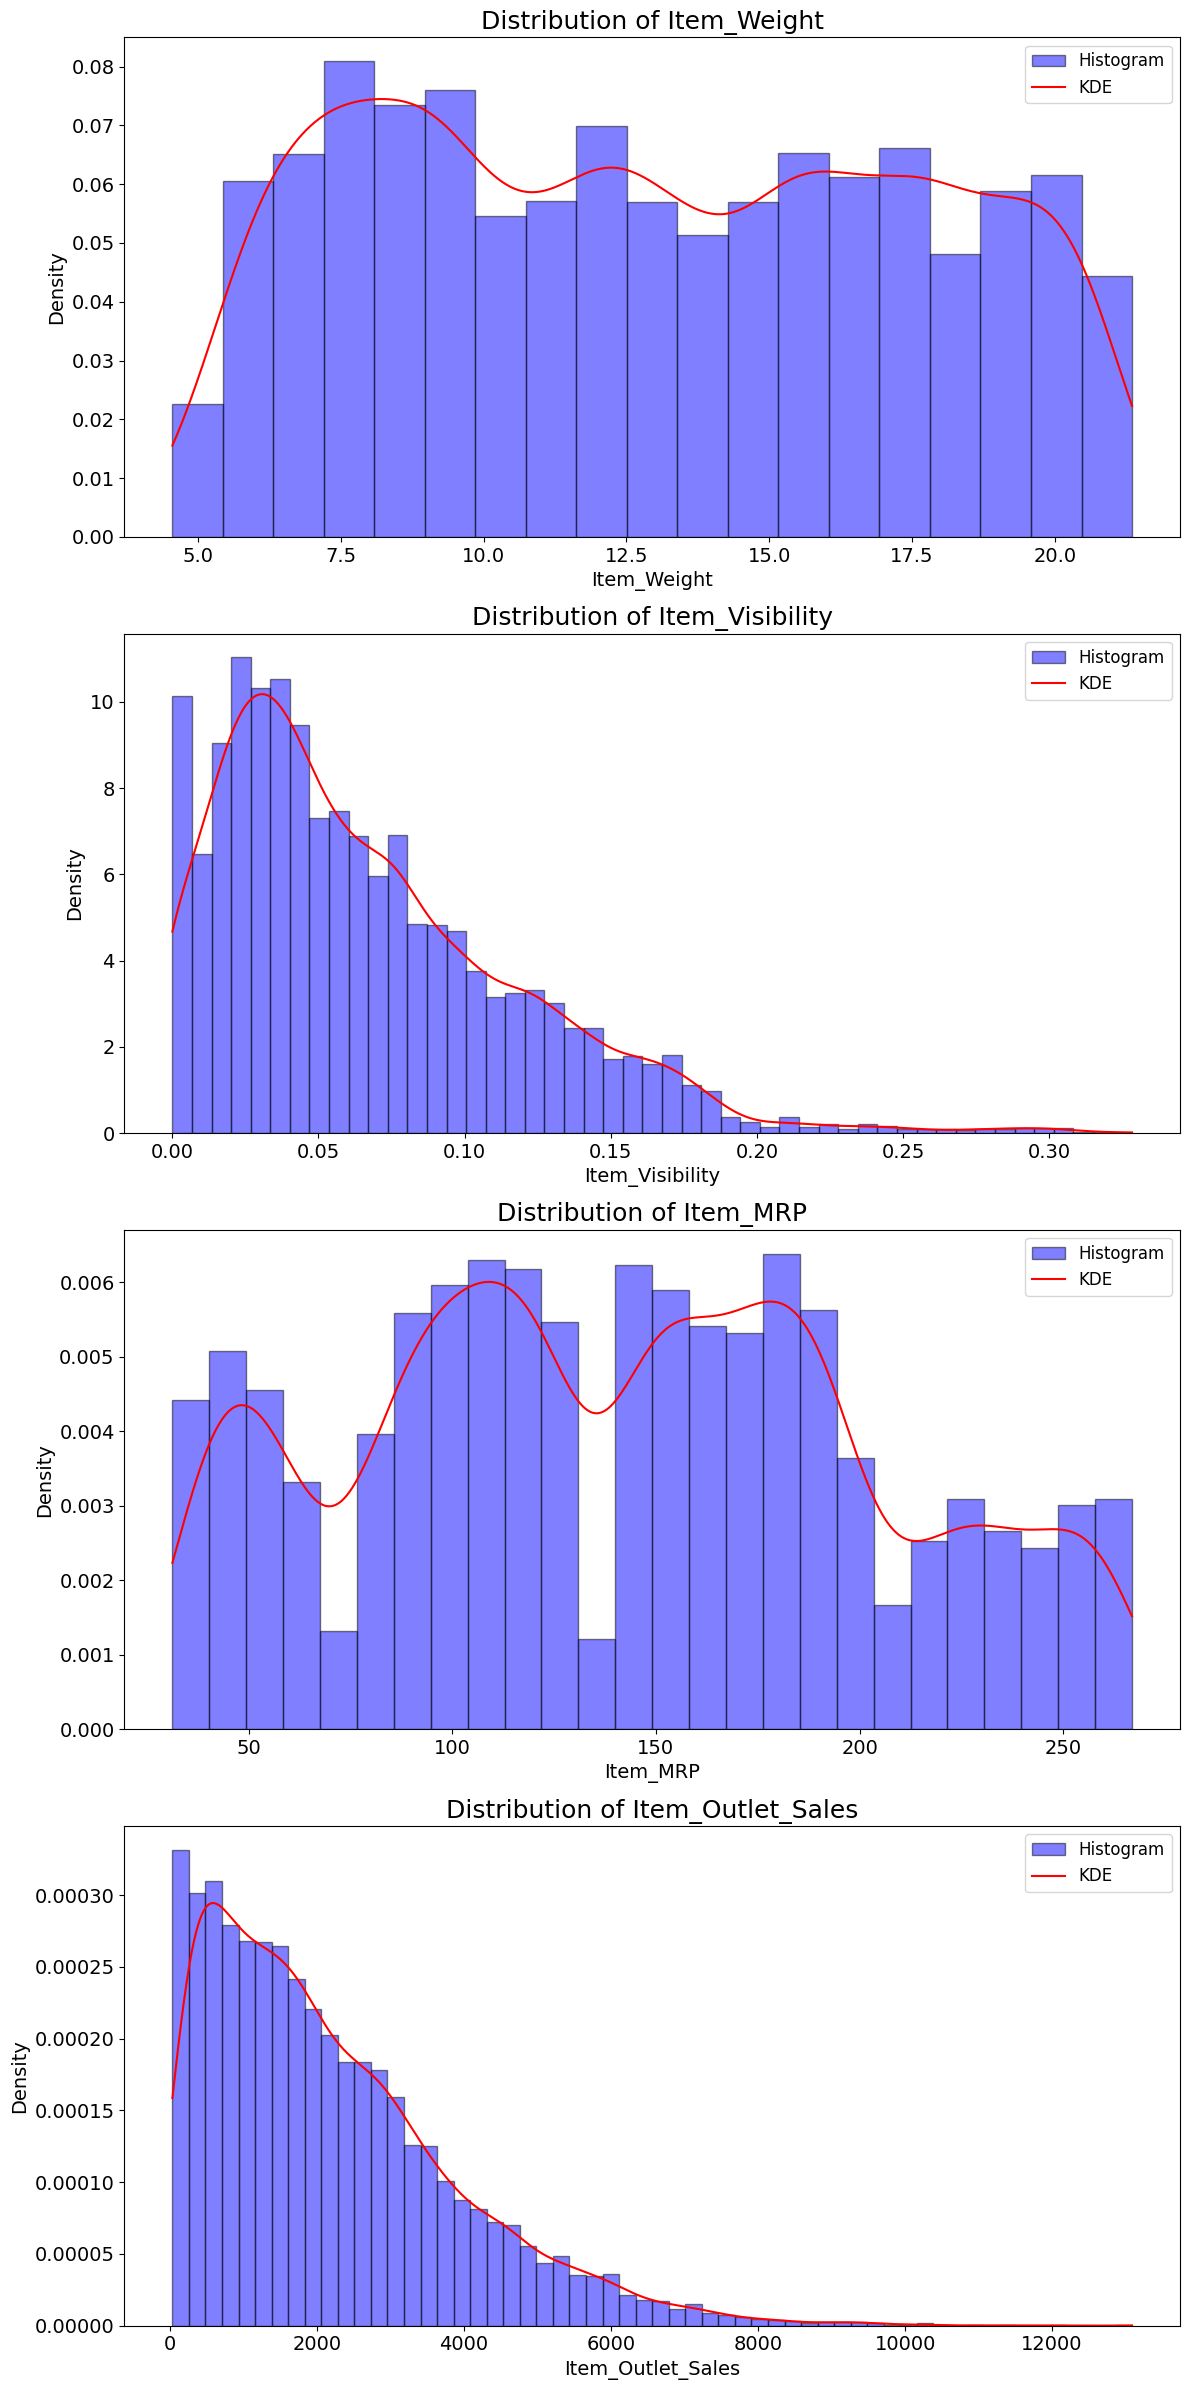

In [ ]:
'''numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Item_Outlet_Sales']

fig, axs = plt.subplots(len(numerical_features), 1, figsize = (12, len(numerical_features) * 6))
fig.subplots_adjust(hspace = 0.4)
axs = axs.flatten()

for i, feature in enumerate(numerical_features):
  data = train_data[feature].dropna()

  axs[i].hist(data, bins = 30, alpha = 0.5, color = 'blue', edgecolor = 'black', density = True, label = 'Histogram')
  kde = gaussian_kde(data)
  x_range = np.linspace(data.min(), data.max(), 1000)
  axs[i].plot(x_range, kde(x_range), color = 'red', label = 'KDE')

  axs[i].set_title(f'Distribution of {feature}', fontsize = 18)
  axs[i].set_xlabel(feature, fontsize = 14)
  axs[i].set_ylabel('Density', fontsize = 14)
  axs[i].legend(fontsize = 12)
  axs[i].tick_params(axis = 'x', labelsize = 14)
  axs[i].tick_params(axis = 'y', labelsize = 14)

plt.tight_layout()
plt.show()
'''

numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

bin_widths = {}

for feature in numerical_features:
  data = train_data[feature].dropna()
  IQR = data.quantile(0.75) - data.quantile(0.25)
  bin_width = 2 * IQR / (len(data) ** (1 / 3))
  bin_widths[feature] = bin_width

print("Calculated bin widths:")
for feature, width in bin_widths.items():
  print(f"{feature}: {width}")

fig, axs = plt.subplots(len(numerical_features), 1, figsize=(12, len(numerical_features) * 6))
fig.subplots_adjust(hspace=0.4)
axs = axs.flatten()

for i, feature in enumerate(numerical_features):
  data = train_data[feature].dropna()
  bin_width = bin_widths[feature]
  min_value = data.min()
  max_value = data.max()
  num_bins = max(1, int((max_value - min_value) / bin_width))

  axs[i].hist(data, bins=num_bins, alpha=0.5, color='blue', edgecolor='black', density=True, label='Histogram')
  kde = gaussian_kde(data)
  x_range = np.linspace(data.min(), data.max(), 1000)
  axs[i].plot(x_range, kde(x_range), color='red', label='KDE')

  axs[i].set_title(f'Distribution of {feature}', fontsize=18)
  axs[i].set_xlabel(feature, fontsize=14)
  axs[i].set_ylabel('Density', fontsize=14)
  axs[i].legend(fontsize=12)
  axs[i].tick_params(axis='x', labelsize=14)
  axs[i].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()


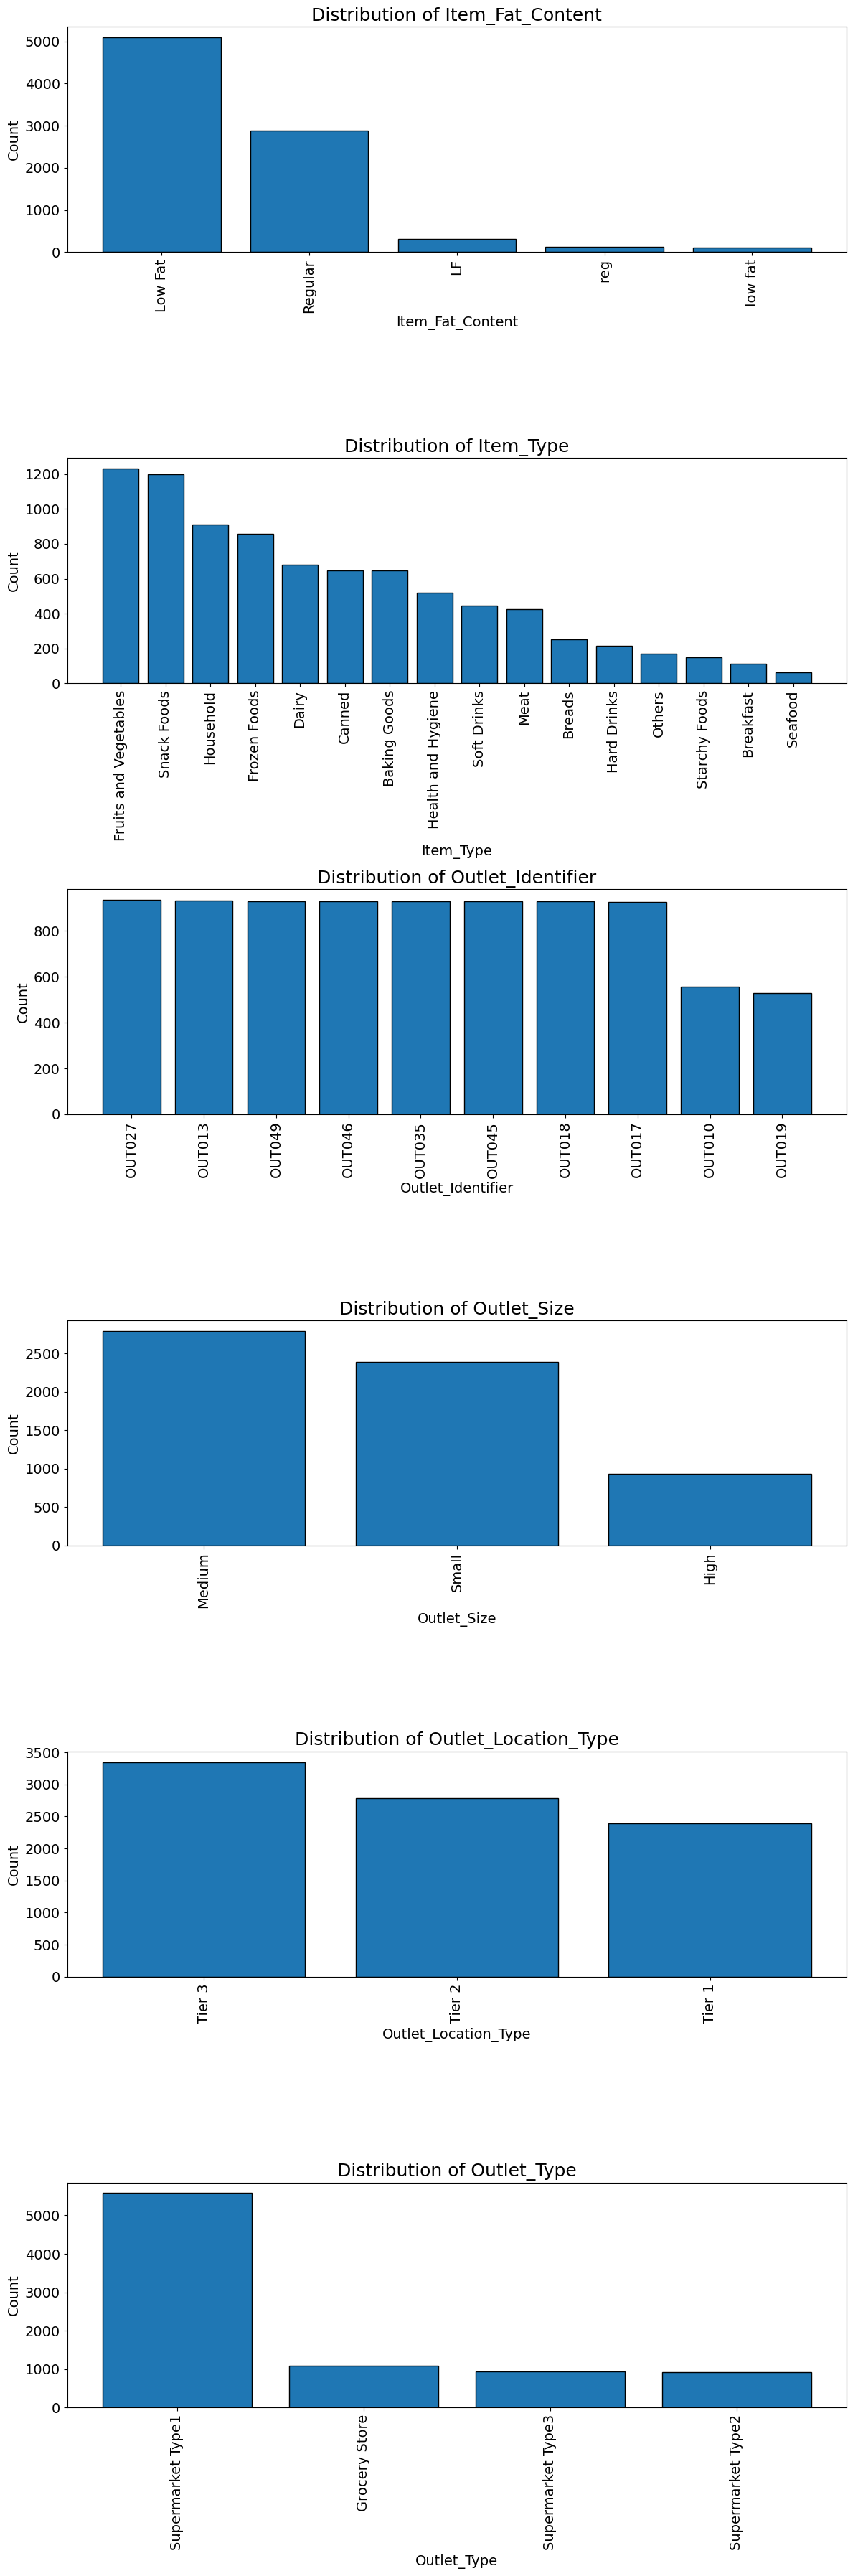

In [ ]:
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

fig, axs = plt.subplots(len(categorical_features), 1, figsize=(12, len(categorical_features) * 6))
fig.subplots_adjust(hspace=0.4)
axs = axs.flatten()

for i, feature in enumerate(categorical_features):
    data = train_data[feature].value_counts()
    categories = data.index
    counts = data.values

    axs[i].bar(categories, counts, edgecolor = 'black')

    axs[i].set_title(f'Distribution of {feature}', fontsize=18)
    axs[i].set_xlabel(feature, fontsize=14)
    axs[i].set_ylabel('Count', fontsize=14)
    axs[i].tick_params(axis='x', labelsize=14, rotation=90)
    axs[i].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()



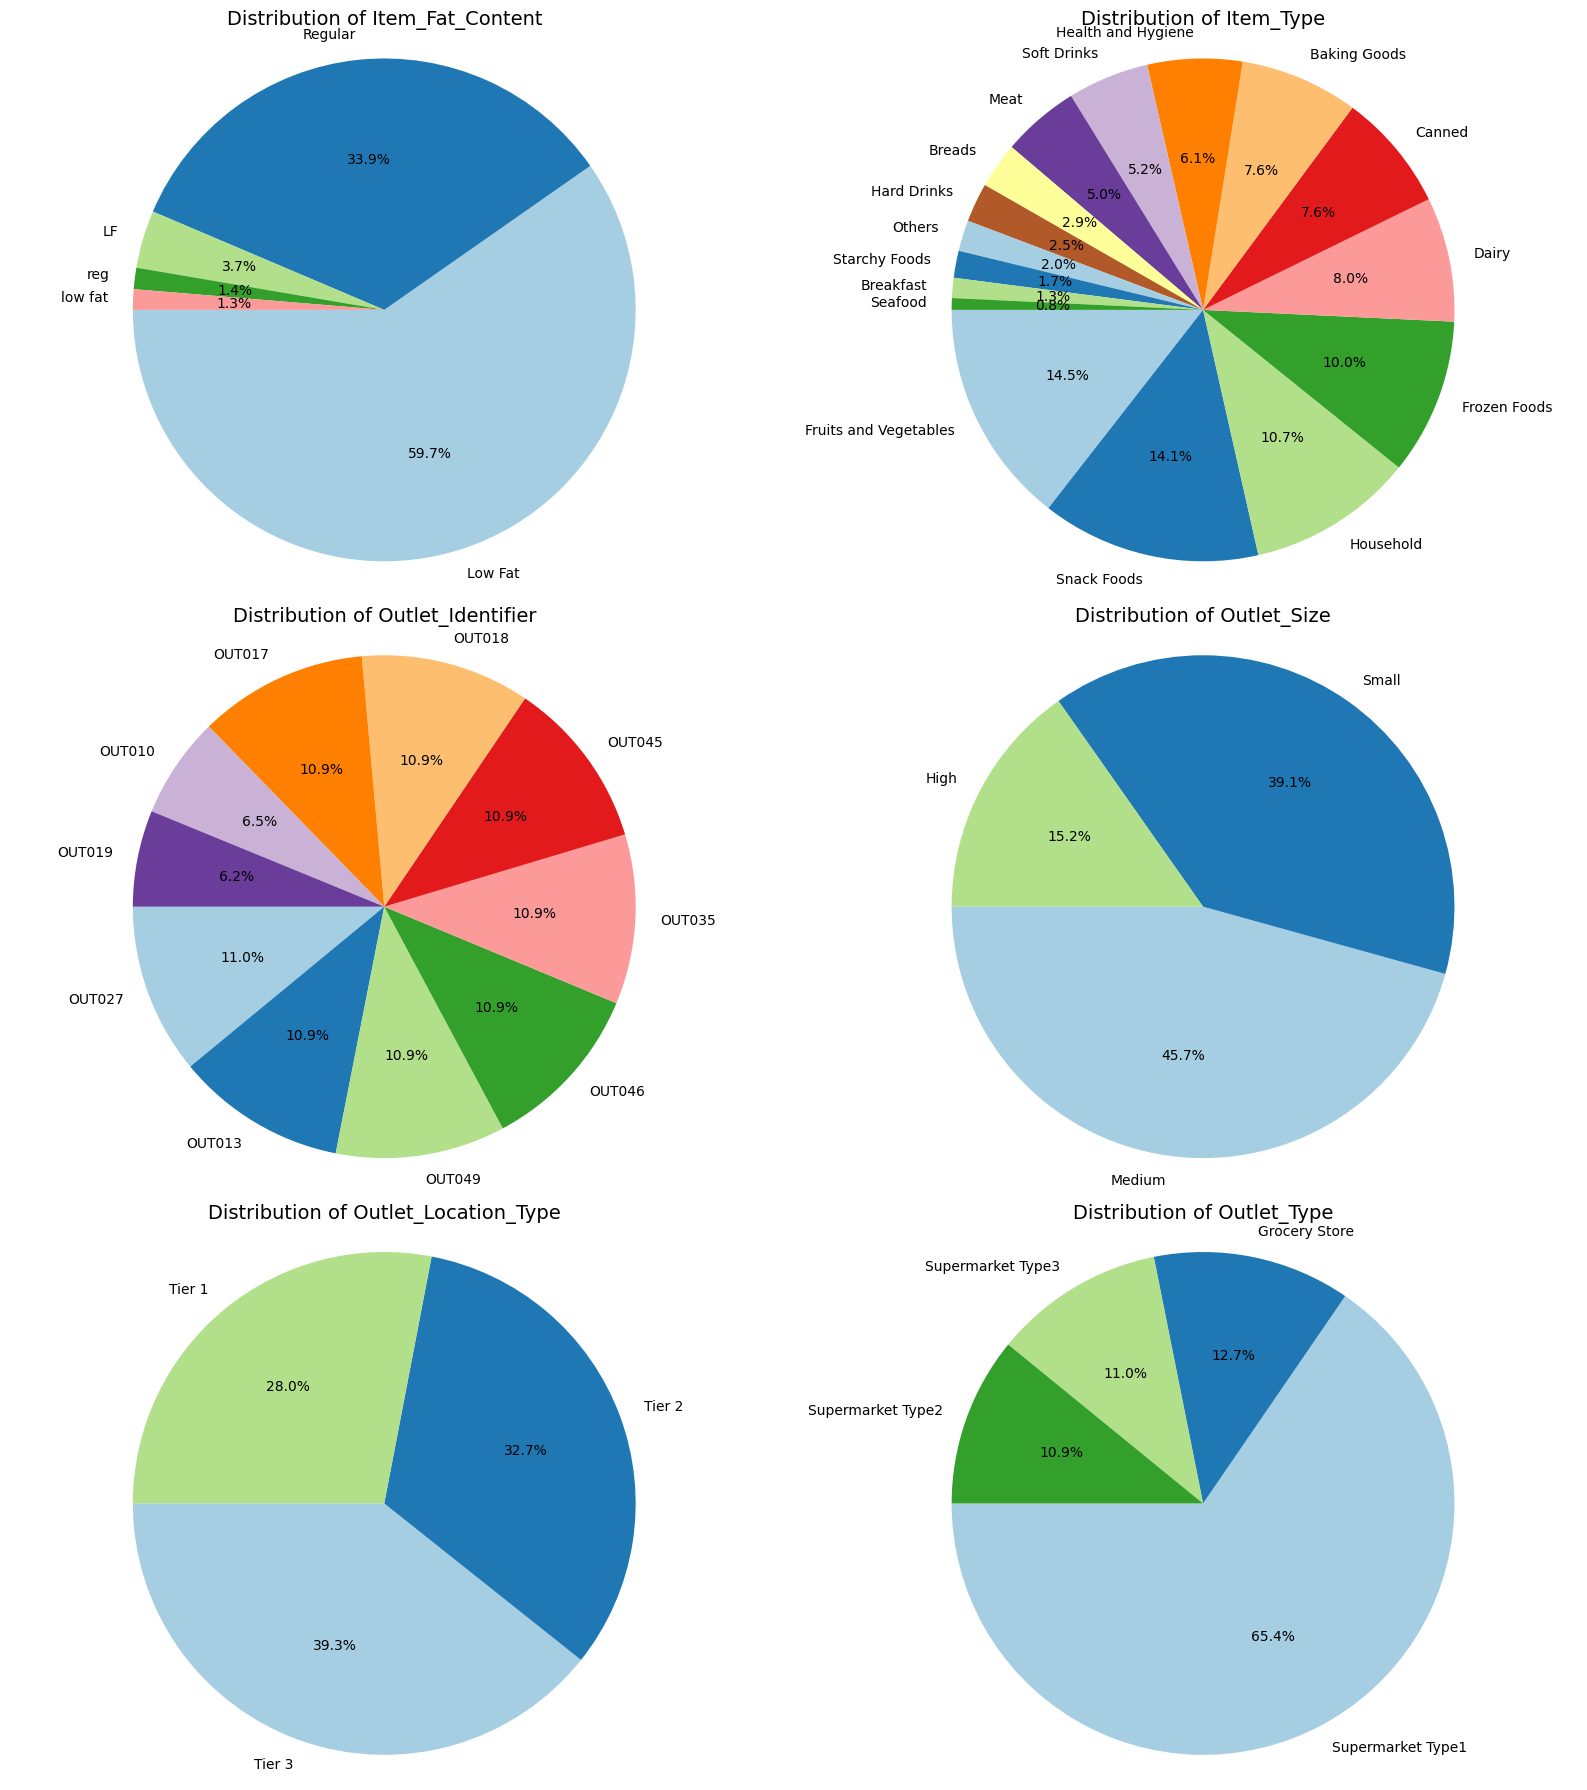

In [ ]:
#Pie chart for a clear and easy visualization of the categorical features
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

num_features = len(categorical_features)
num_cols = 2
num_rows = (num_features + 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs = axs.flatten()

for i, feature in enumerate(categorical_features):
    data = train_data[feature].value_counts()
    axs[i].pie(data, labels=data.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=180)
    axs[i].set_title(f'Distribution of {feature}', fontsize=14)
    axs[i].axis('equal')

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


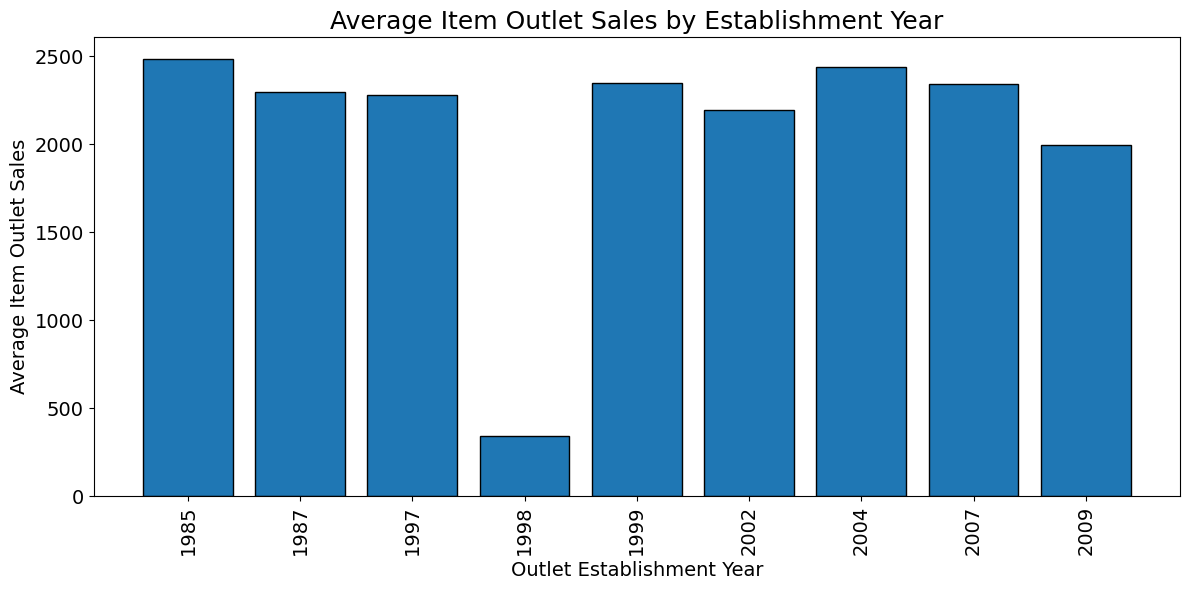

In [ ]:
avg_sales_per_year = train_data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()

plt.figure(figsize=(12, 6))
plt.bar(avg_sales_per_year.index.astype(str), avg_sales_per_year.values, edgecolor = 'black')
plt.title('Average Item Outlet Sales by Establishment Year', fontsize = 18)
plt.xlabel('Outlet Establishment Year', fontsize = 14)
plt.ylabel('Average Item Outlet Sales', fontsize = 14)
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.show()

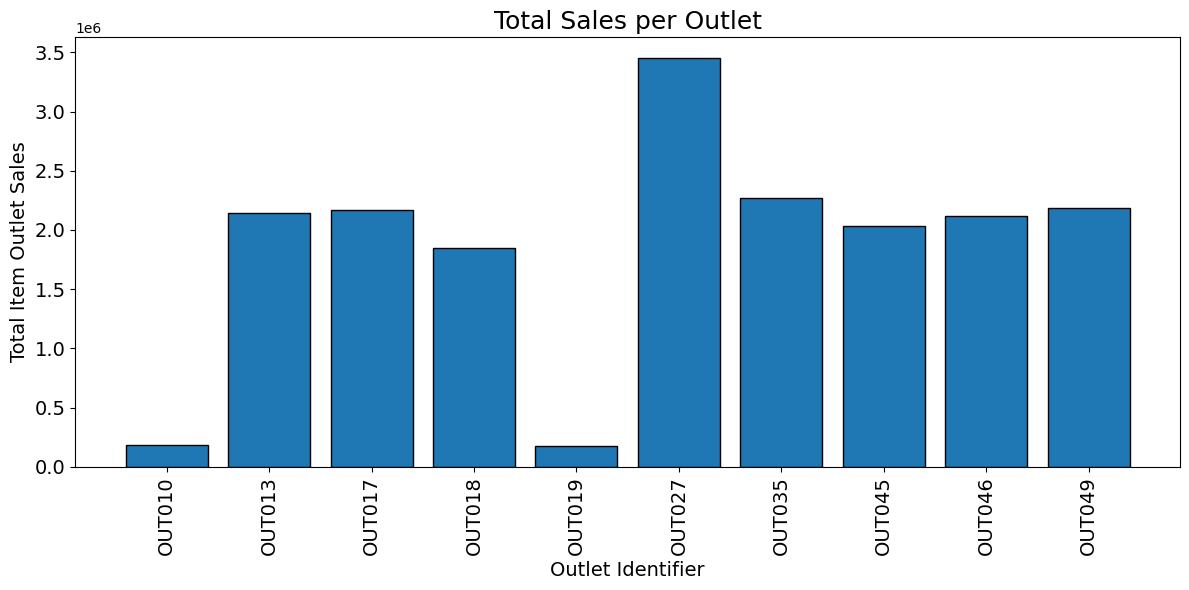

In [ ]:
total_sales_per_outlet = train_data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(12, 6))

plt.bar(total_sales_per_outlet.index.astype(str), total_sales_per_outlet.values, edgecolor = 'black')
plt.title('Total Sales per Outlet', fontsize=18)
plt.xlabel('Outlet Identifier', fontsize=14)
plt.ylabel('Total Item Outlet Sales', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

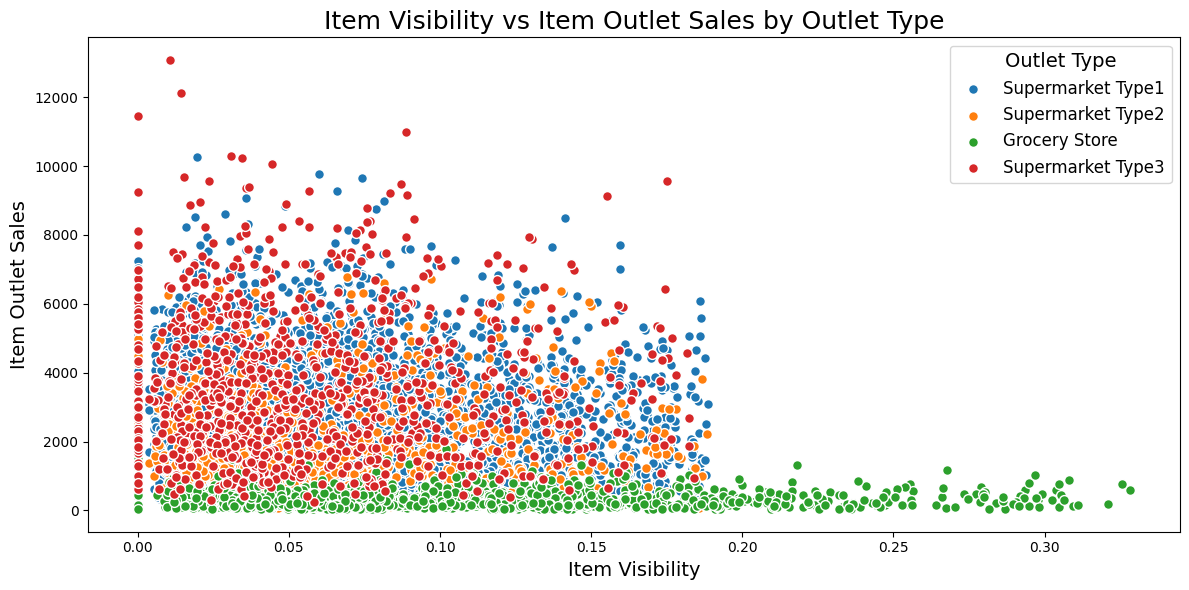

In [ ]:
plt.figure(figsize=(12, 6))
for outlet_type in train_data['Outlet_Type'].unique():
    subset = train_data[train_data['Outlet_Type'] == outlet_type]
    plt.scatter(subset['Item_Visibility'], subset['Item_Outlet_Sales'], label=outlet_type, alpha = 1, edgecolor = 'white', s = 50)

plt.title('Item Visibility vs Item Outlet Sales by Outlet Type', fontsize=18)
plt.xlabel('Item Visibility', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.legend(title='Outlet Type', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

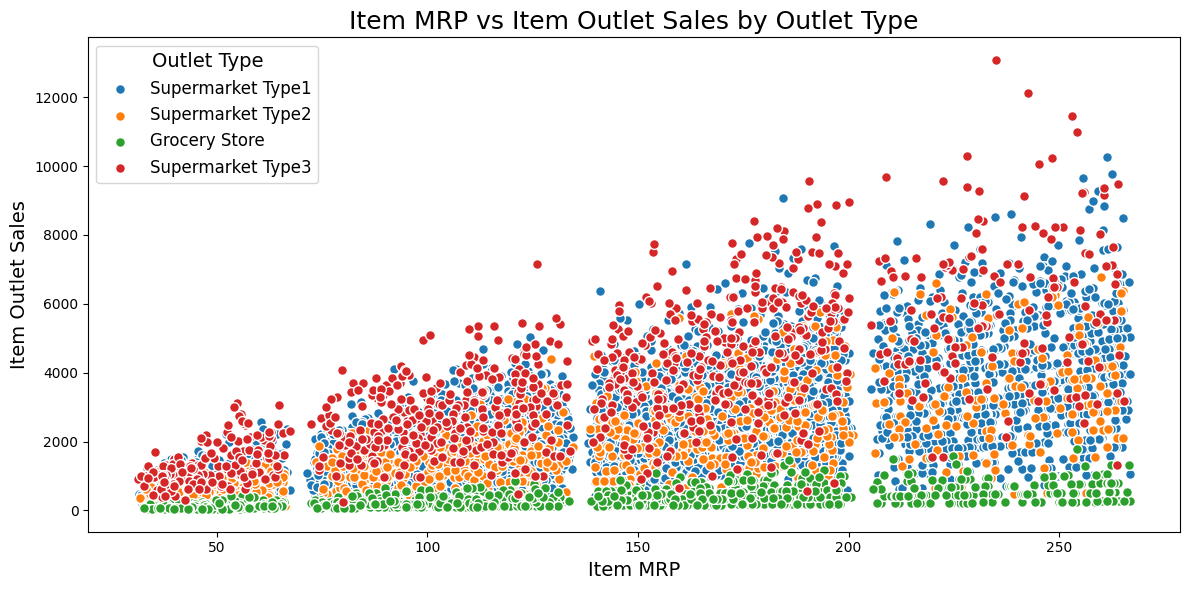

In [ ]:
plt.figure(figsize=(12, 6))
for outlet_type in train_data['Outlet_Type'].unique():
    subset = train_data[train_data['Outlet_Type'] == outlet_type]
    plt.scatter(subset['Item_MRP'], subset['Item_Outlet_Sales'], label=outlet_type, alpha = 1, edgecolor = 'white', s = 50)

plt.title('Item MRP vs Item Outlet Sales by Outlet Type', fontsize=18)
plt.xlabel('Item MRP', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.legend(title='Outlet Type', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

###Advanced EDA

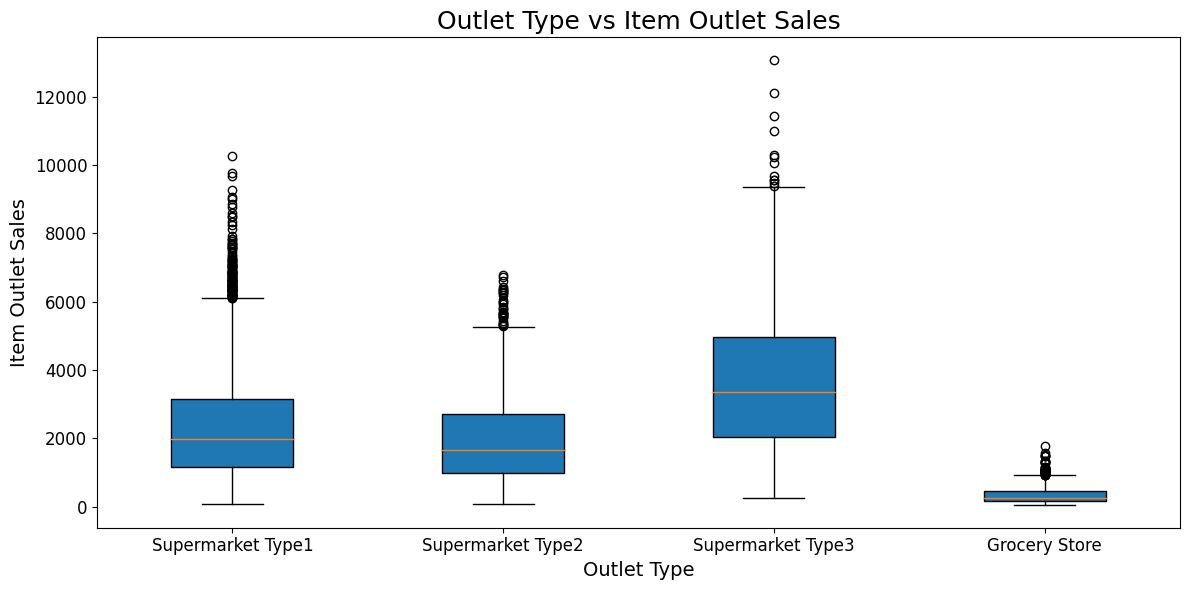

In [ ]:
'''
plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Type'] == outlet]['Item_Outlet_Sales'] for outlet in train_data['Outlet_Type'].unique()], patch_artist=True)

plt.title('Outlet Type vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(train_data['Outlet_Type'].unique()) + 1), train_data['Outlet_Type'].unique(), fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
'''
outlet_type_order = ['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Grocery Store']

plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Type'] == outlet]['Item_Outlet_Sales'] for outlet in outlet_type_order], patch_artist=True)

plt.title('Outlet Type vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(outlet_type_order) + 1), outlet_type_order, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

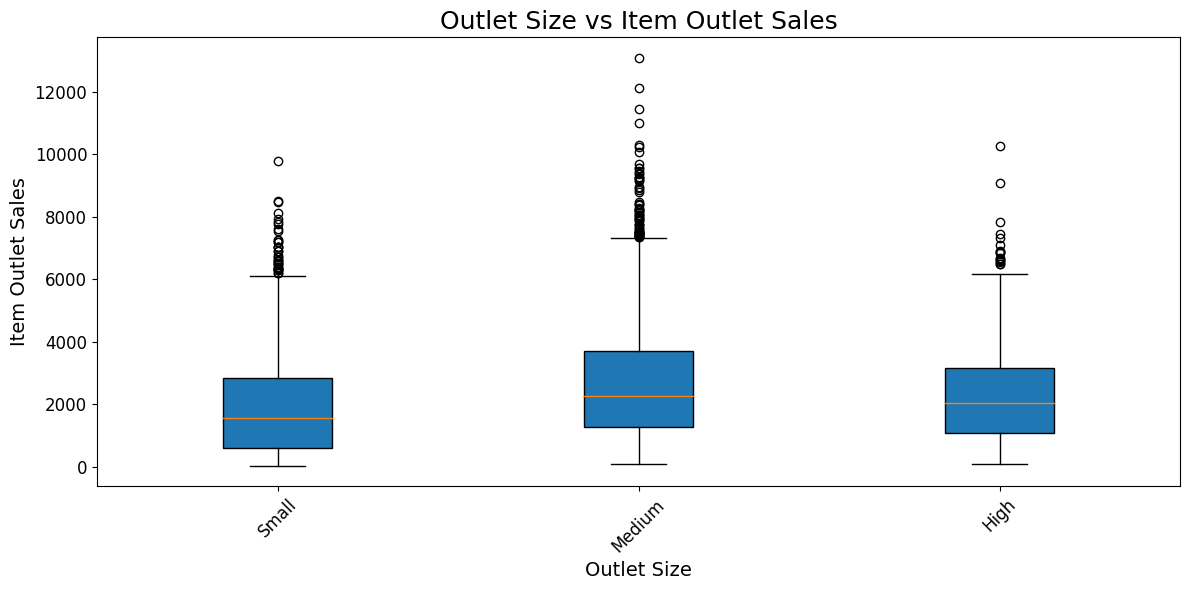

In [ ]:
'''plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Size'] == size]['Item_Outlet_Sales'] for size in train_data['Outlet_Size'].unique()], patch_artist=True)

plt.title('Outlet Size vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Size', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(train_data['Outlet_Size'].unique()) + 1), train_data['Outlet_Size'].unique(), rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
'''

filtered_data = train_data.dropna(subset=['Outlet_Size'])

outlet_size_order = ['Small', 'Medium', 'High']

plt.figure(figsize=(12, 6))
plt.boxplot([filtered_data[filtered_data['Outlet_Size'] == outlet]['Item_Outlet_Sales'] for outlet in outlet_size_order], patch_artist=True)

plt.title('Outlet Size vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Size', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(outlet_size_order) + 1), outlet_size_order, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()



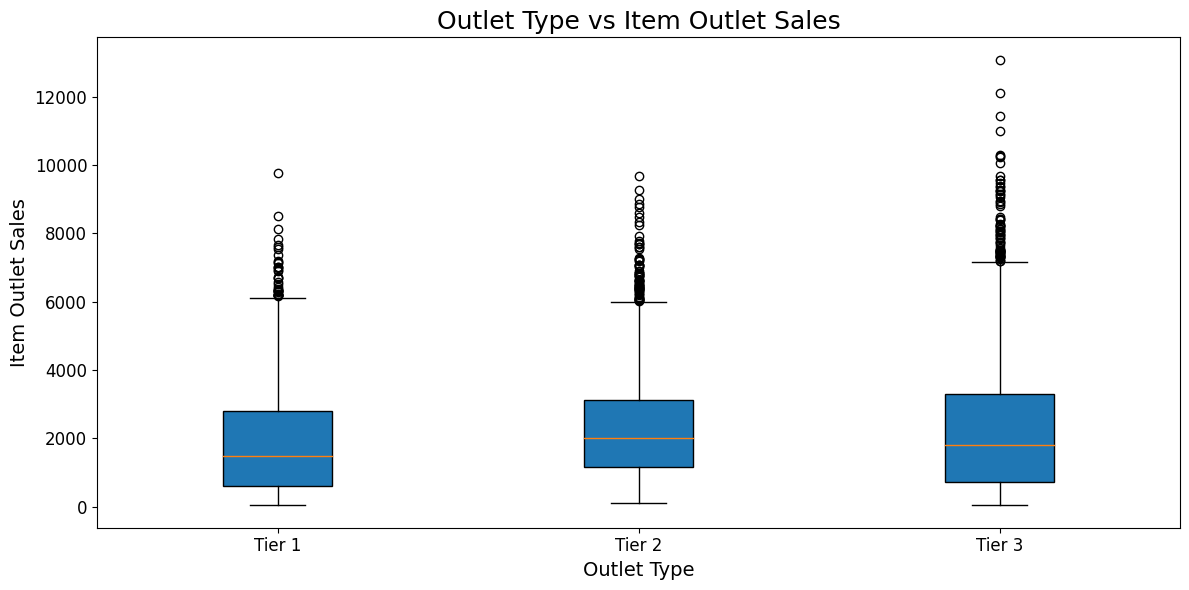

In [ ]:
'''plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Location_Type'] == location]['Item_Outlet_Sales'] for location in train_data['Outlet_Location_Type'].unique()], patch_artist=True)

plt.title('Outlet Location Type vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Location Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(train_data['Outlet_Location_Type'].unique()) + 1), train_data['Outlet_Location_Type'].unique(), rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
'''

outlet_location_order = ['Tier 1', 'Tier 2', 'Tier 3']

plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Location_Type'] == location]['Item_Outlet_Sales'] for location in outlet_location_order], patch_artist=True)

plt.title('Outlet Type vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(outlet_location_order) + 1), outlet_location_order, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

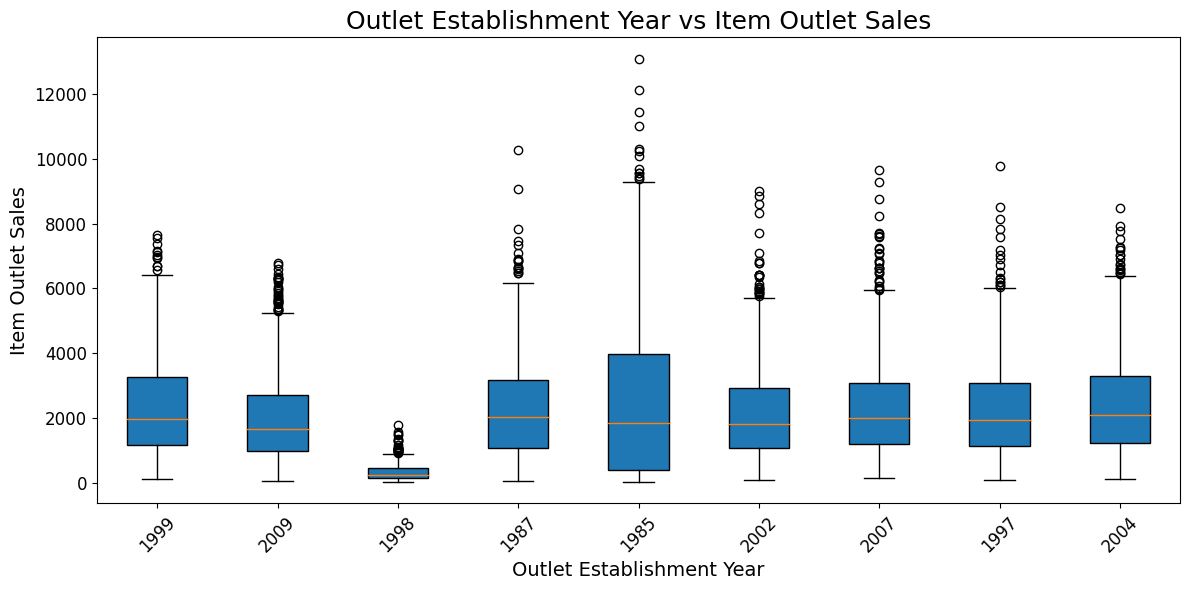

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Establishment_Year'] == year]['Item_Outlet_Sales'] for year in train_data['Outlet_Establishment_Year'].unique()], patch_artist=True)

plt.title('Outlet Establishment Year vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Establishment Year', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(train_data['Outlet_Establishment_Year'].unique()) + 1), train_data['Outlet_Establishment_Year'].unique(),  rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

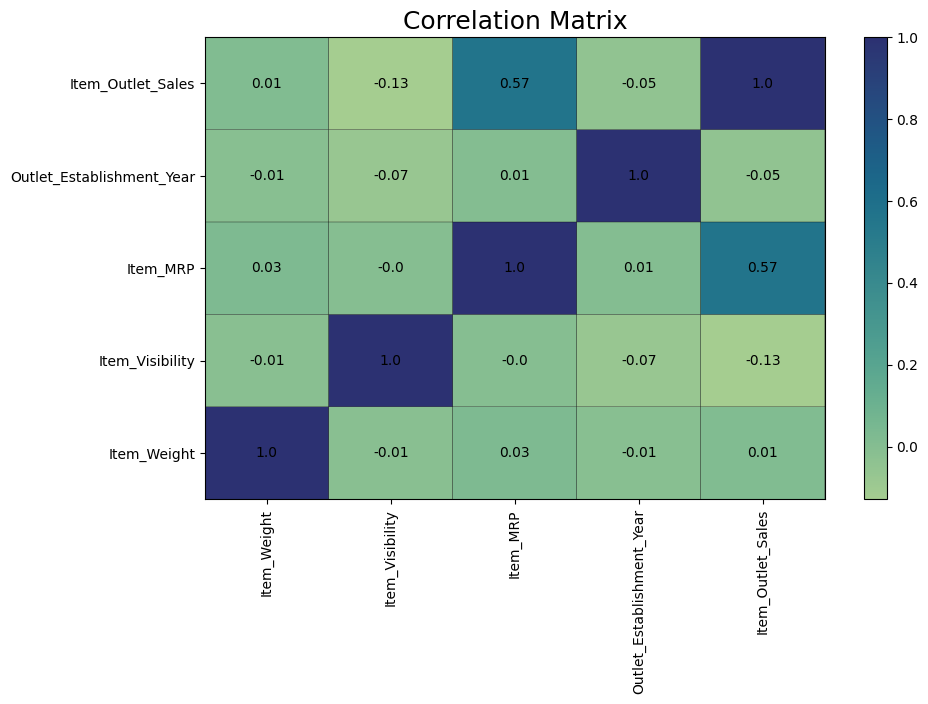

In [ ]:
numeric_data = train_data.select_dtypes(include = ['float64' , 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize = (10,6))
plt.pcolor(correlation_matrix, cmap = 'crest', edgecolors = 'k', linewidths = 0.2)
plt.colorbar()

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, round(correlation_matrix.iloc[i, j], 2),
                 ha='center', va='center', color='black')

plt.xticks(np.arange(0.5, len(correlation_matrix.columns), 1), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(0.5, len(correlation_matrix.columns), 1), correlation_matrix.columns)
plt.title('Correlation Matrix', fontsize=18)

plt.show()

###Handling missing values using imputation method

---



In [ ]:
#Preprocessing the train data

train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Preprocessing the test data

test_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
test_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
#Verifying the null values
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

###Feature Engineering

###Handling Outliers

In [ ]:
def cap_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q1 + 1.5 * IQR

  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
  return df

def cap_outliers_grouped(df, column, group_by_column):
  df = df.groupby(group_by_column, group_keys=False).apply(lambda x: cap_outliers(x.copy(), column).reset_index(drop=True))
  return df

train_data = cap_outliers_grouped(train_data, 'Item_Outlet_Sales', 'Outlet_Type')
train_data = cap_outliers_grouped(train_data, 'Item_Outlet_Sales', 'Outlet_Size')
train_data = cap_outliers_grouped(train_data, 'Item_Outlet_Sales', 'Outlet_Establishment_Year')
train_data = cap_outliers_grouped(train_data, 'Item_Outlet_Sales', 'Outlet_Location_Type')

print("Shape of train data after capping the outliers: ", train_data.shape)

Shape of train data after capping the outliers:  (8523, 12)


In [ ]:
#Standardizing the Item_Fat_Content for train data
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({
    'low fat' : 'Low Fat',
    'LF' : 'Low Fat',
    'reg' : 'Regular'
})

print("Unique Values in Item_Fat_Content after standardization: ")
print(train_data['Item_Fat_Content'].unique())

Unique Values in Item_Fat_Content after standardization: 
['Low Fat' 'Regular']


In [ ]:
#Standardizing the Item_Fat_Content for test data
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({
    'low fat' : 'Low Fat',
    'LF' : 'Low Fat',
    'reg' : 'Regular'
})

print("Unique Values in Item_Fat_Content after standardization: ")
print(test_data['Item_Fat_Content'].unique())

Unique Values in Item_Fat_Content after standardization: 
['Low Fat' 'Regular']


In [ ]:
#Creating a new feature Units_Sold_Per_Outlet by dividing Item_Outlet_Sales by Item_MRP
train_data['Units_Sold'] = (train_data['Item_Outlet_Sales'] / train_data['Item_MRP']).round()

units_sold_per_outlet = train_data.groupby('Outlet_Identifier')['Units_Sold'].sum().reset_index()

print(units_sold_per_outlet)

  Outlet_Identifier  Units_Sold
0            OUT010      1220.0
1            OUT013     14317.0
2            OUT017     14704.0
3            OUT018     12188.0
4            OUT019      1213.0
5            OUT027     22126.0
6            OUT035     14925.0
7            OUT045     13809.0
8            OUT046     14339.0
9            OUT049     14685.0


In [ ]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Units_Sold
0,FDC37,12.857645,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,2.0
1,FDC14,12.857645,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,3.0
2,FDS02,12.857645,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,611.2044,3.0
3,FDI26,12.857645,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,611.2044,3.0
4,FDY40,12.857645,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076,3.0


In [ ]:
#LabelEncoding
outlet_size_mapping = {'Small': 1, 'Medium': 2, 'High': 3}
outlet_location_type_mapping = {'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3}
outlet_type_mapping = {'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3, 'Grocery Store': 4}
item_fat_content_mapping = {'Low Fat': 1, 'Regular': 2}

train_data['Outlet_Size'] = train_data['Outlet_Size'].map(outlet_size_mapping)
train_data['Outlet_Location_Type'] = train_data['Outlet_Location_Type'].map(outlet_location_type_mapping)
train_data['Outlet_Type'] = train_data['Outlet_Type'].map(outlet_type_mapping)
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].map(item_fat_content_mapping)

print("Unique values after label encoding:")
print("Outlet_Size:", train_data['Outlet_Size'].unique())
print("Outlet_Location_Type:", train_data['Outlet_Location_Type'].unique())
print("Outlet_Type:", train_data['Outlet_Type'].unique())
print("Item_Fat_Content:", train_data['Item_Fat_Content'].unique())

Unique values after label encoding:
Outlet_Size: [1 2 3]
Outlet_Location_Type: [1 2 3]
Outlet_Type: [4 1 3 2]
Item_Fat_Content: [1 2]


In [ ]:
#OneHotEncoding

columns_to_encode = ['Item_Type','Outlet_Identifier']
columns_to_encode = [col for col in columns_to_encode if col in train_data.columns]

train_data_encoded = pd.get_dummies(train_data, columns= columns_to_encode, drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns = columns_to_encode, drop_first=True)

In [ ]:
train_data_encoded.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDC37,12.857645,1,0.057557,107.6938,1985,1,1,4,214.3876,...,False,False,False,False,True,False,False,False,False,False
1,FDC14,12.857645,2,0.072222,43.6454,1985,1,1,4,125.8362,...,False,False,False,False,True,False,False,False,False,False
2,FDS02,12.857645,2,0.255395,196.8794,1985,1,1,4,611.2044,...,False,False,False,False,True,False,False,False,False,False
3,FDI26,12.857645,1,0.061082,180.0344,1985,1,1,4,611.2044,...,False,False,False,False,True,False,False,False,False,False
4,FDY40,12.857645,2,0.150286,51.0692,1985,1,1,4,147.8076,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
train_data_encoded.shape

(8523, 35)

In [ ]:
test_data_encoded.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Breads,...,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDW58,20.750000,Low Fat,0.007565,107.8622,1999,Medium,Tier 1,Supermarket Type1,False,...,False,False,False,False,False,False,False,False,False,True
1,FDW14,8.300000,Regular,0.038428,87.3198,2007,Medium,Tier 2,Supermarket Type1,False,...,False,False,True,False,False,False,False,False,False,False
2,NCN55,14.600000,Low Fat,0.099575,241.7538,1998,Medium,Tier 3,Grocery Store,False,...,False,False,False,False,False,False,False,False,False,False
3,FDQ58,7.315000,Low Fat,0.015388,155.0340,2007,Medium,Tier 2,Supermarket Type1,False,...,False,False,True,False,False,False,False,False,False,False
4,FDY38,12.857645,Regular,0.118599,234.2300,1985,Medium,Tier 3,Supermarket Type3,False,...,False,False,False,False,False,True,False,False,False,False


###EDA after preprocessing

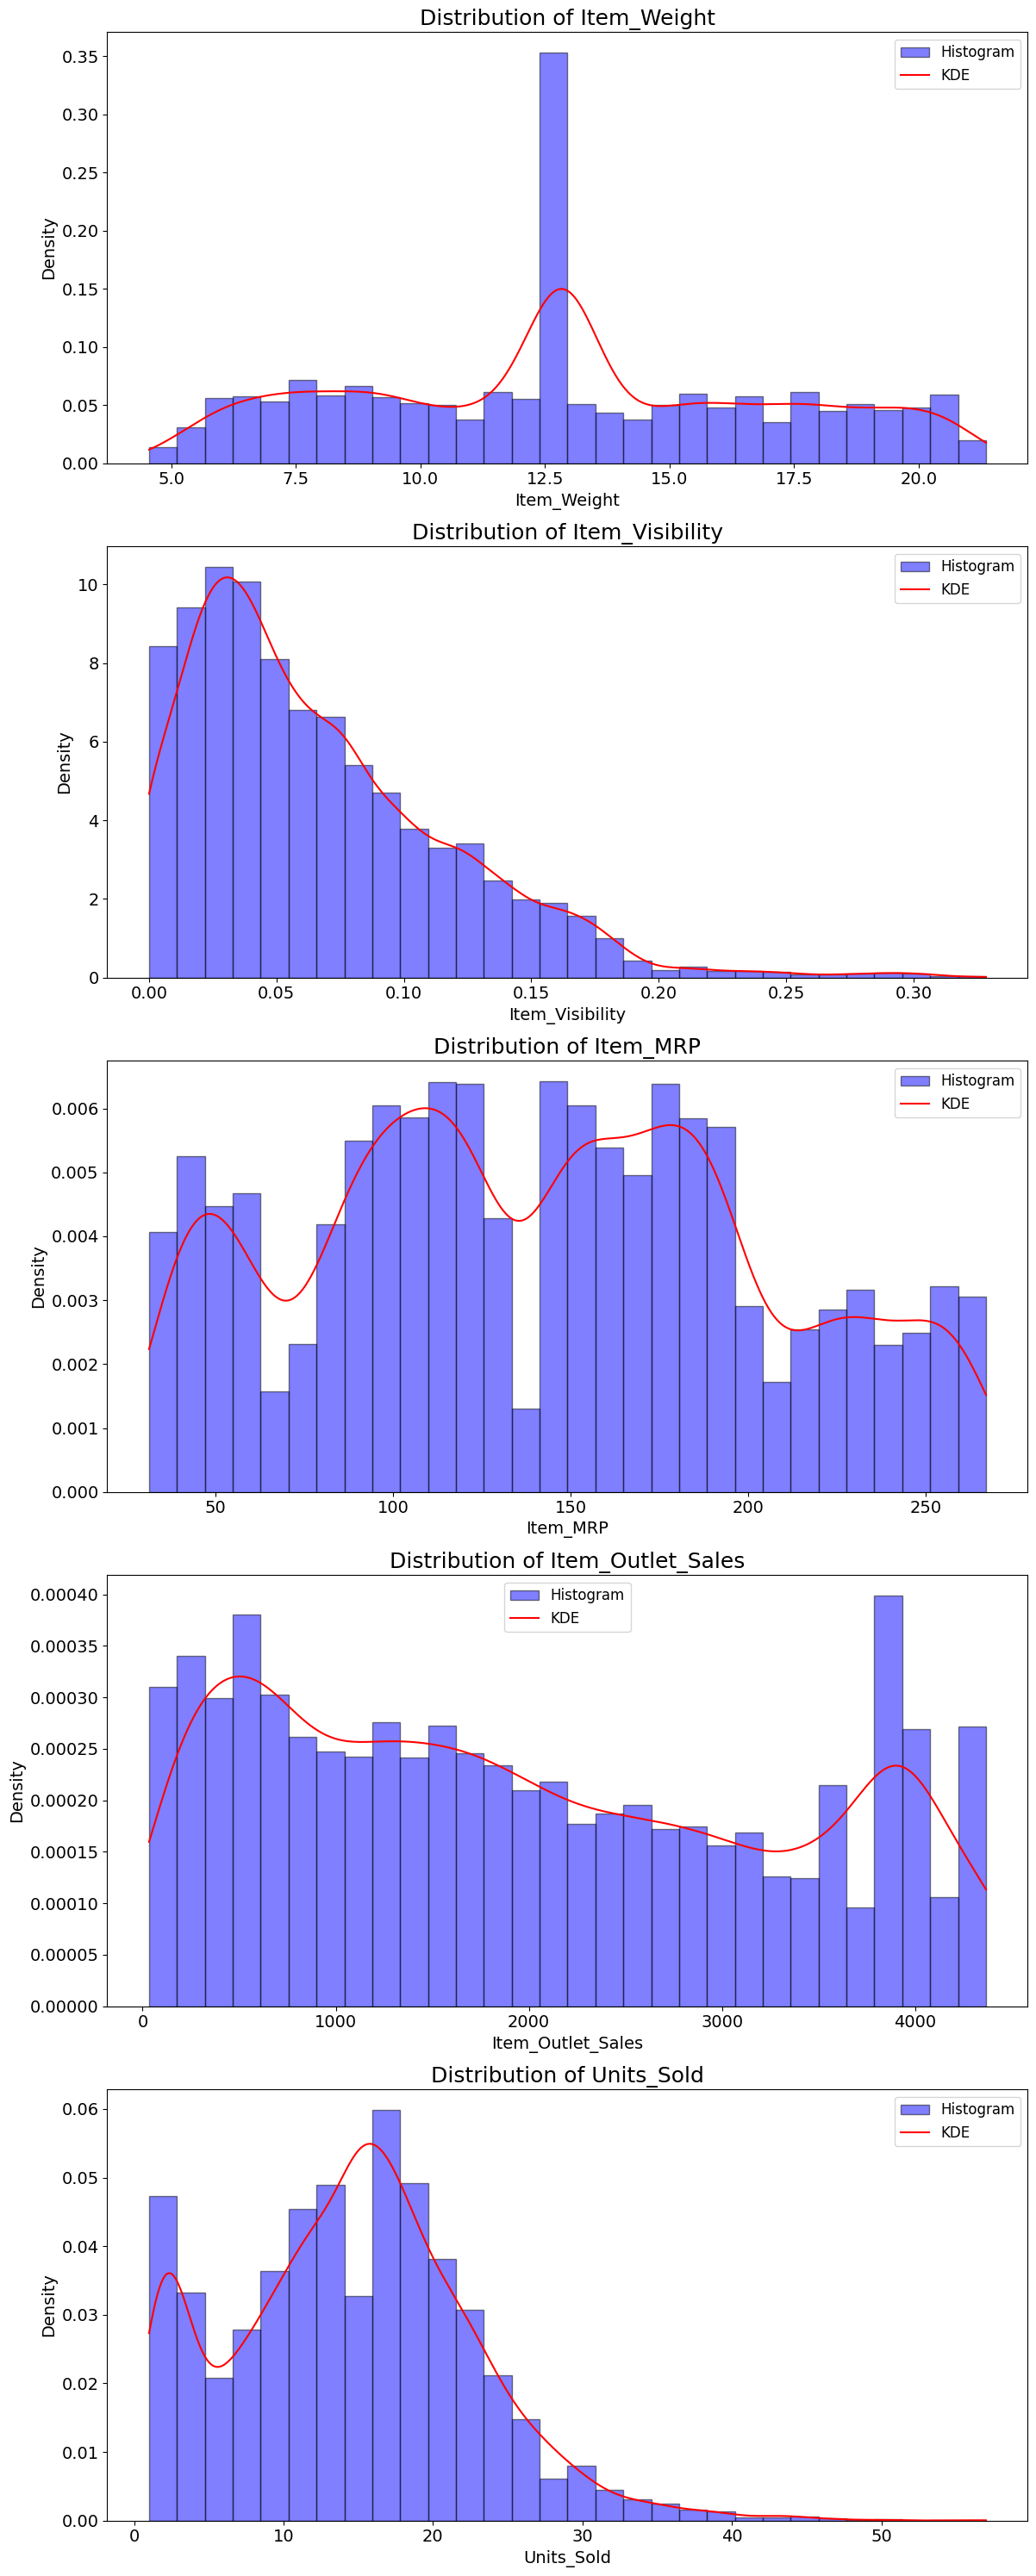

In [ ]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Units_Sold']

fig, axs = plt.subplots(len(numerical_features), 1, figsize=(12, len(numerical_features) * 6))
fig.subplots_adjust(hspace=0.4)
axs = axs.flatten()

for i, feature in enumerate(numerical_features):
    data = train_data_encoded[feature].dropna()

    # Histogram
    axs[i].hist(data, bins=30, alpha=0.5, color='blue', edgecolor='black', density=True, label='Histogram')

    # KDE
    kde = gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 1000)
    axs[i].plot(x_range, kde(x_range), color='red', label='KDE')

    # Customizing plot
    axs[i].set_title(f'Distribution of {feature}', fontsize=18)
    axs[i].set_xlabel(feature, fontsize=14)
    axs[i].set_ylabel('Density', fontsize=14)
    axs[i].legend(fontsize=12)
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

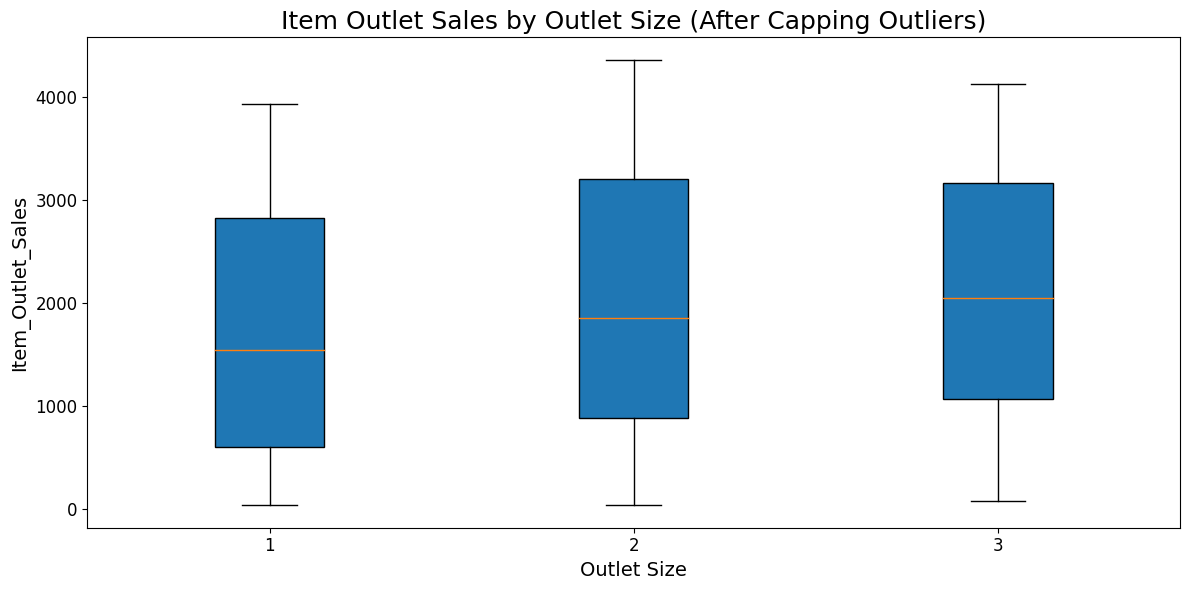

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Size']== outlet]['Item_Outlet_Sales']for outlet in sorted(train_data['Outlet_Size'].unique())],patch_artist = True)

plt.title('Item Outlet Sales by Outlet Size (After Capping Outliers)', fontsize=18)
plt.xlabel('Outlet Size', fontsize = 14)
plt.ylabel('Item_Outlet_Sales', fontsize = 14)

outlet_size_labels = ['1', '2', '3']
plt.xticks(range(1,len(outlet_size_labels) + 1), outlet_size_labels, fontsize = 12)
plt.yticks(fontsize = 12)

plt.tight_layout()
plt.show()

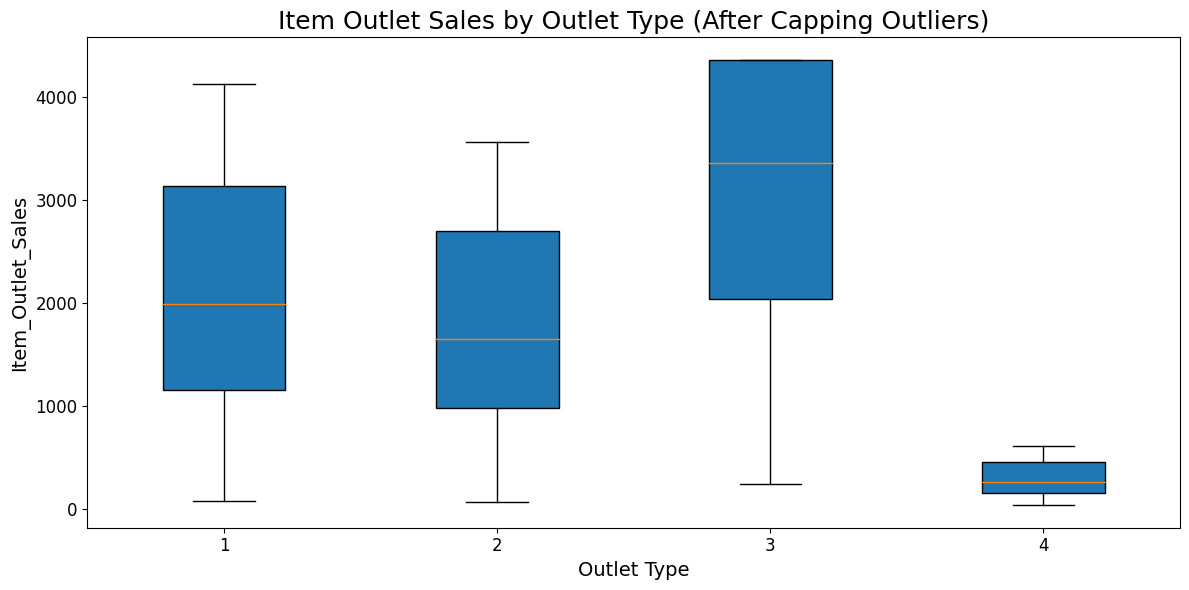

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Type']== outlet]['Item_Outlet_Sales']for outlet in sorted(train_data['Outlet_Type'].unique())],patch_artist = True)

plt.title('Item Outlet Sales by Outlet Type (After Capping Outliers)', fontsize=18)
plt.xlabel('Outlet Type', fontsize = 14)
plt.ylabel('Item_Outlet_Sales', fontsize = 14)

outlet_type_labels = ['1', '2', '3', '4']
plt.xticks(range(1,len(outlet_type_labels) + 1), outlet_type_labels, fontsize = 12)
plt.yticks(fontsize = 12)

plt.tight_layout()
plt.show()

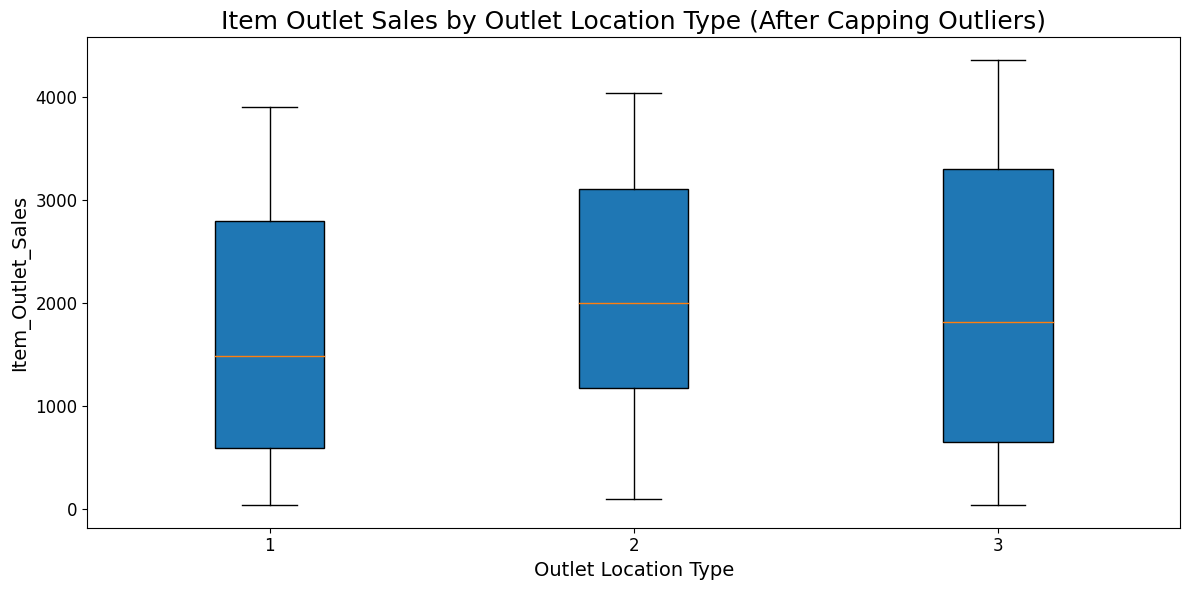

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Location_Type']== outlet]['Item_Outlet_Sales']for outlet in sorted(train_data['Outlet_Location_Type'].unique())],patch_artist = True)

plt.title('Item Outlet Sales by Outlet Location Type (After Capping Outliers)', fontsize=18)
plt.xlabel('Outlet Location Type', fontsize = 14)
plt.ylabel('Item_Outlet_Sales', fontsize = 14)

outlet_location_labels = ['1', '2', '3']
plt.xticks(range(1,len(outlet_location_labels) + 1), outlet_location_labels, fontsize = 12)
plt.yticks(fontsize = 12)

plt.tight_layout()
plt.show()

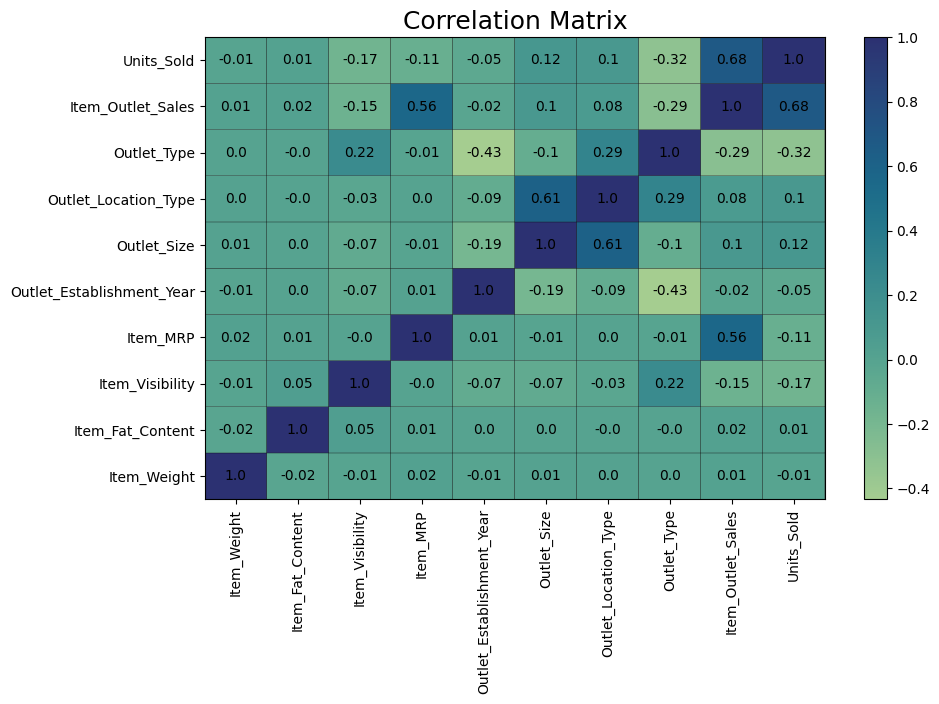

In [ ]:
numeric_data_encoded = train_data_encoded.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data_encoded.corr()

plt.figure(figsize=(10,6))
plt.pcolor(correlation_matrix, cmap='crest', linewidths=0.2, edgecolors='k')
plt.colorbar()

for i in range(len(correlation_matrix.columns)):
  for j in range(len(correlation_matrix.columns)):
    plt.text(j + 0.5, i + 0.5, round(correlation_matrix.iloc[i, j], 2),ha='center', va='center', color='black')

plt.xticks(np.arange(0.5, len(correlation_matrix.columns), 1), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(0.5, len(correlation_matrix.columns), 1), correlation_matrix.columns)
plt.title('Correlation Matrix', fontsize=18)

plt.show()


In [ ]:
'''plt.title = plt.suptitle
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data = train_data)
plt.title('Item Outlet Sales by Outlet Type (After Capping Outliers)')
plt.xlabel('Outlet_Type')
plt.ylabel('Item Outlet Sales')
plt.show()
'''

"plt.title = plt.suptitle\nplt.figure(figsize=(12, 6))\nsns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data = train_data)\nplt.title('Item Outlet Sales by Outlet Type (After Capping Outliers)')\nplt.xlabel('Outlet_Type')\nplt.ylabel('Item Outlet Sales')\nplt.show()\n"

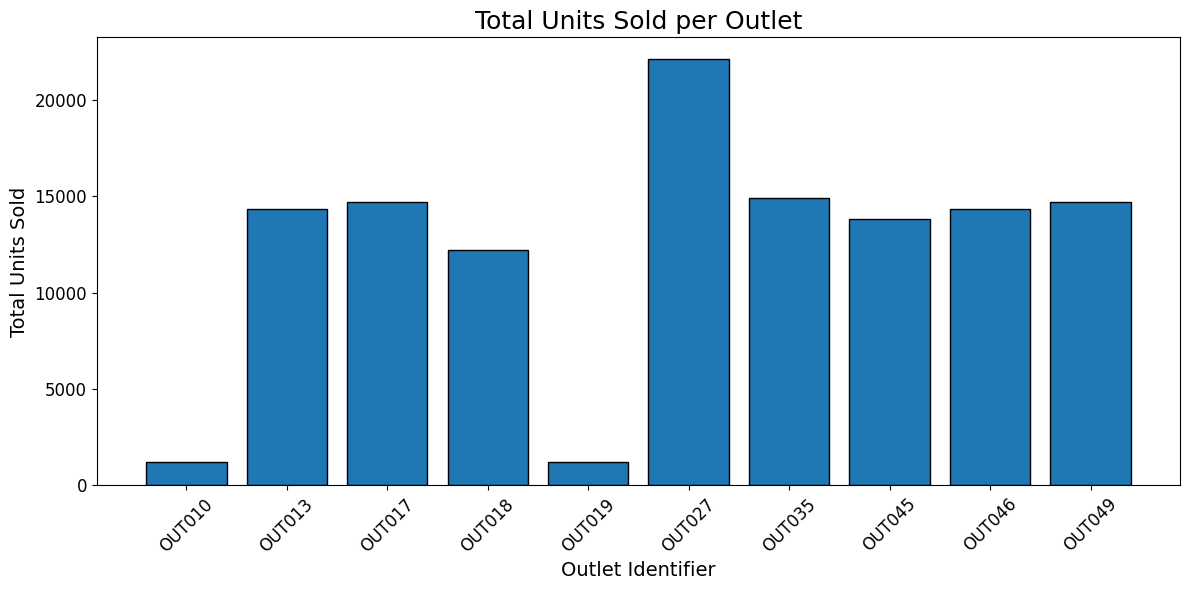

In [ ]:
units_sold_per_outlet = train_data.groupby('Outlet_Identifier')['Units_Sold'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(units_sold_per_outlet['Outlet_Identifier'], units_sold_per_outlet['Units_Sold'], edgecolor = 'black')

plt.title('Total Units Sold per Outlet', fontsize=18)
plt.xlabel('Outlet Identifier', fontsize=14)
plt.ylabel('Total Units Sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


##Regression Analysis

In [ ]:
print(train_data.describe())

       Item_Weight  Item_Fat_Content  Item_Visibility     Item_MRP  \
count  8523.000000       8523.000000      8523.000000  8523.000000   
mean     12.857645          1.352693         0.066132   140.992782   
std       4.226124          0.477836         0.051598    62.275067   
min       4.555000          1.000000         0.000000    31.290000   
25%       9.310000          1.000000         0.026989    93.826500   
50%      12.857645          1.000000         0.053931   143.012800   
75%      16.000000          2.000000         0.094585   185.643700   
max      21.350000          2.000000         0.328391   266.888400   

       Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
count                8523.000000  8523.000000           8523.000000   
mean                 1997.831867     1.829168              2.112871   
std                     8.371760     0.600327              0.812757   
min                  1985.000000     1.000000              1.000000   
25%           

In [ ]:
X = train_data[['Item_Visibility', 'Item_MRP', 'Outlet_Type']]
y = train_data['Item_Outlet_Sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_val)

print(f'Mean Squared Error: {mean_squared_error(y_val, y_pred)}')
print(f'R^2 Score: {r2_score(y_val, y_pred)}')

Mean Squared Error: 1054984.126982599
R^2 Score: 0.38128327317386657


#Using Polynomial regression for a better score

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(train_data[['Item_Visibility', 'Item_MRP', 'Outlet_Type']])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, train_data['Item_Outlet_Sales'], test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 603149.879898957
R^2 Score: 0.6462705836683993


Mean Squared Error: 590168.2167255153
R^2 Score: 0.6538839419569299


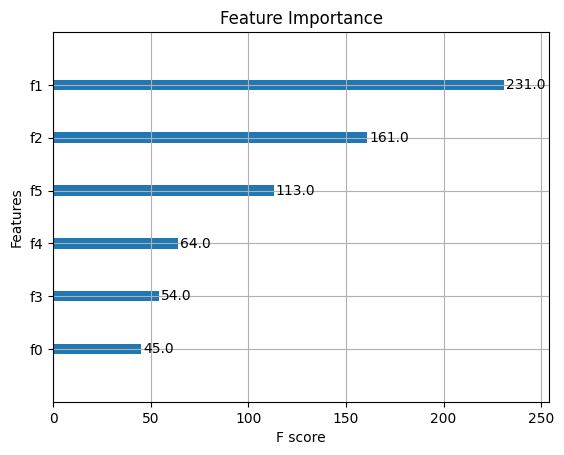

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(train_data[['Item_Visibility', 'Item_MRP', 'Outlet_Type']])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, train_data['Item_Outlet_Sales'], test_size=0.2, random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = xgb.XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, scoring='r2', n_jobs=-1, cv=5, random_state=42)
random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_

y_pred = best_xgb.predict(X_val)

mse = mean_squared_error(y_val, y_pred)

r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

xgb.plot_importance(best_xgb)
plt.title('Feature Importance')
plt.show()

In [61]:
features = ['Item_Visibility', 'Item_MRP', 'Outlet_Type', 'Units_Sold']
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

X_poly = poly.fit_transform(train_data[features])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

feature_names = poly.get_feature_names_out(features)

print(feature_names)

['Item_Visibility' 'Item_MRP' 'Outlet_Type' 'Units_Sold'
 'Item_Visibility Item_MRP' 'Item_Visibility Outlet_Type'
 'Item_Visibility Units_Sold' 'Item_MRP Outlet_Type' 'Item_MRP Units_Sold'
 'Outlet_Type Units_Sold']


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, train_data['Item_Outlet_Sales'], test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_val)


mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

#Interaction Effect Analysis

In [ ]:
X_interact = train_data[['Item_Visibility', 'Item_MRP', 'Outlet_Type', 'Outlet_Size', 'Outlet_Establishment_Year', 'Outlet_Location_Type']].copy()
y_interact = train_data['Item_Outlet_Sales']

In [ ]:
X_interact.loc[:, 'Visibility_Size'] = X_interact['Item_Visibility'] * X_interact['Outlet_Size']
X_interact.loc[:, 'MRP_Size'] = X_interact['Item_MRP'] * X_interact['Outlet_Size']
X_interact.loc[:, 'Visibility_Year'] = X_interact['Item_Visibility'] * X_interact['Outlet_Establishment_Year']
X_interact.loc[:, 'MRP_Year'] = X_interact['Item_MRP'] * X_interact['Outlet_Establishment_Year']
X_interact.loc[:, 'Visibility_Location'] = X_interact['Item_Visibility'] * X_interact['Outlet_Location_Type']
X_interact.loc[:, 'MRP_Location'] = X_interact['Item_MRP'] * X_interact['Outlet_Location_Type']

X_train_interact, X_val_interact, y_train_interact, y_val_interact = train_test_split(X_interact, y_interact, test_size=0.2, random_state=42)
interaction_model = LinearRegression()
interaction_model.fit(X_train_interact, y_train_interact)
y_pred_interact = interaction_model.predict(X_val_interact)
print(f'Mean Squared Error (Interaction): {mean_squared_error(y_val_interact, y_pred_interact)}')
print(f'R^2 Score (Interaction): {r2_score(y_val_interact, y_pred_interact)}')

Mean Squared Error (Interaction): 900478.3856362142
R^2 Score (Interaction): 0.4718962825232075


In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f'{model.__class__.__name__} - Mean Squared Error: {mean_squared_error(y_val, y_pred)}')
    print(f'{model.__class__.__name__} - R^2 Score: {r2_score(y_val, y_pred)}')

#Model Development

In [ ]:
decision_tree = DecisionTreeRegressor(random_state=42)
train_and_evaluate_model(decision_tree, X_train, y_train, X_val, y_val)

# Random Forest
random_forest = RandomForestRegressor(random_state=42)
train_and_evaluate_model(random_forest, X_train, y_train, X_val, y_val)

# XGBoost
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
train_and_evaluate_model(xgboost_model, X_train, y_train, X_val, y_val)

DecisionTreeRegressor - Mean Squared Error: 1170392.0876081584
DecisionTreeRegressor - R^2 Score: 0.31359994617239495
RandomForestRegressor - Mean Squared Error: 708530.2898937634
RandomForestRegressor - R^2 Score: 0.5844681160520708
XGBRegressor - Mean Squared Error: 674019.5947953446
XGBRegressor - R^2 Score: 0.6047076094867816


In [ ]:
outlet_type_mapping = {'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3, 'Grocery Store': 4}

test_data['Outlet_Type'] = test_data['Outlet_Type'].map(outlet_type_mapping)

test_data['Outlet_Type'].fillna(0, inplace=True)

test_features = test_data[['Item_Visibility', 'Item_MRP', 'Outlet_Type']]

test_features = test_features.apply(pd.to_numeric, errors='coerce')

test_features.fillna(0, inplace=True)

In [ ]:
test_predictions = xgboost_model.predict(test_features)
output = pd.DataFrame({'Item_Identifier': test_data['Item_Identifier'],
                       'Outlet_Identifier': test_data['Outlet_Identifier'],
                       'Item_Outlet_Sales': test_predictions})
output.to_csv('BigMart_Sales_Predictions2.csv', index=False)


ValueError: Feature shape mismatch, expected: 6, got 3